<a href="https://colab.research.google.com/github/VUDataSci/data-presentation-InioluwaOyetunji/blob/main/Data_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
### Load all packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

In [5]:
### Data cleaning and pre-processing

# Read the dataset for the analysis: Data on labor force, employment, unemployment and GDP
Labor_df = pd.read_csv("Labor_Data.csv")


# Check if the main dataset fulfills the requirements
num_rows, num_columns = Labor_df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")


Labor_df.head()

Number of rows: 1335, Number of columns: 17


,Time,Time Code,Country Name,Country Code,"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]","Labor force participation rate, total (% of total population ages 15+) (national estimate) [SL.TLF.CACT.NE.ZS]",Employment in agriculture (% of total employment) (modeled ILO estimate) [SL.AGR.EMPL.ZS],"Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]",Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS],Employment in services (% of total employment) (modeled ILO estimate) [SL.SRV.EMPL.ZS],"Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]","Employment to population ratio, 15+, total (%) (national estimate) [SL.EMP.TOTL.SP.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]
0,2018,YR2018,World,WLD,59.94096313,..,26.87243798,3.354908327,22.82594899,50.3016134,56.52486519,56.98496072,5.699075945,5.911690176,..,3.288049781,2.161636506
1,2018,YR2018,Afghanistan,AFG,47.394,..,44.39712,2.308126,18.12015,37.48273,42.128,..,11.11,..,..,1.189228128,-1.688576593
2,2018,YR2018,Albania,ALB,59.3,59.3,37.28573,3.294396,19.74566,42.96861,52.006,52,12.3,12.3,..,4.019345617,4.276311551
3,2018,YR2018,Algeria,DZA,41.766,..,10.00731,4.636921,30.68305,59.30961,37.415,..,10.416,..,..,1.2,-0.707950481
4,2018,YR2018,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,2.671118531,4.874061125


In [6]:
### Renaming the columns to a more readable and presentable way

# Define a mapping of original column names to shorter, snake case names
column_name_mapping = {
    'Time': 'year',
    'Time Code': 'year_code',
    'Country Name': 'country_name',
    'Country Code': 'country_code',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]': 'Labor_participation_rate_total_modeled',
    'Labor force participation rate, total (% of total population ages 15+) (national estimate) [SL.TLF.CACT.NE.ZS]': 'Labor_participation_rate_total_national',
    'Employment in agriculture (% of total employment) (modeled ILO estimate) [SL.AGR.EMPL.ZS]': 'employment_agriculture_modeled',
    'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]': 'employers_percent_modeled',
    'Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]': 'employment_industry_modeled',
    'Employment in services (% of total employment) (modeled ILO estimate) [SL.SRV.EMPL.ZS]': 'employment_services_modeled',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]': 'employment_ratio_15+_total_modeled',
    'Employment to population ratio, 15+, total (%) (national estimate) [SL.EMP.TOTL.SP.NE.ZS]': 'employment_ratio_15+_total_national',
    'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]': 'unemployment_total_modeled',
    'Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]': 'unemployment_total_national',
    'Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]': 'children_in_employment_percent',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'gdp_growth_annual_percent',
    'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]': 'gdp_per_capita_growth_annual_percent'
}

# Rename the columns using the mapping
Labor_df = Labor_df.rename(columns=column_name_mapping)

# Sort the by country and year
Labor_df = Labor_df.sort_values(by=['country_name', 'year'])



In [7]:
### Check for missing values in the dataset

# Replace ellipsis (...) with NaN so missing values can be consistent all through.
Labor_df.replace('..', np.nan, inplace=True)

# Total count of missing values in each column
missing_count = Labor_df.isna().sum()

# Print the missing values in the columns
print(missing_count)


year                                          3
year_code                                     5
country_name                                  5
country_code                                  5
Labor_participation_rate_total_modeled      168
Labor_participation_rate_total_national     713
employment_agriculture_modeled              397
employers_percent_modeled                   397
employment_industry_modeled                 397
employment_services_modeled                 397
employment_ratio_15+_total_modeled          168
employment_ratio_15+_total_national         694
unemployment_total_modeled                  168
unemployment_total_national                 665
children_in_employment_percent             1335
gdp_growth_annual_percent                    82
gdp_per_capita_growth_annual_percent         83
dtype: int64


In [8]:
### Adressing missing values by using KNN imputation method

# Create a copy of the selected data for imputation
KNN_data = Labor_df.copy()

# Select the numeric columns that are important to the analysis for imputation
KNN_numeric_columns = ["Labor_participation_rate_total_modeled",
                       "employment_agriculture_modeled",
                       "employment_industry_modeled",
                       "employment_services_modeled",
                       "employment_ratio_15+_total_modeled",
                       "unemployment_total_modeled",
                      "gdp_growth_annual_percent"]

# Apply KNN imputation to numeric columns
imp = KNNImputer(n_neighbors=2, weights="uniform")
KNN_imputed_data = pd.DataFrame(imp.fit_transform(KNN_data[KNN_numeric_columns]), columns=KNN_numeric_columns)

# Merge imputed data with non-numeric columns
imputed_data = pd.concat([KNN_data[["country_name", "year"]], KNN_imputed_data], axis=1)

imputed_data.info()
imputed_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 1 to 1332
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country_name                            1330 non-null   object 
 1   year                                    1332 non-null   object 
 2   Labor_participation_rate_total_modeled  1335 non-null   float64
 3   employment_agriculture_modeled          1335 non-null   float64
 4   employment_industry_modeled             1335 non-null   float64
 5   employment_services_modeled             1335 non-null   float64
 6   employment_ratio_15+_total_modeled      1335 non-null   float64
 7   unemployment_total_modeled              1335 non-null   float64
 8   gdp_growth_annual_percent               1335 non-null   float64
dtypes: float64(7), object(2)
memory usage: 104.3+ KB


,country_name,year,Labor_participation_rate_total_modeled,employment_agriculture_modeled,employment_industry_modeled,employment_services_modeled,employment_ratio_15+_total_modeled,unemployment_total_modeled,gdp_growth_annual_percent
1,Afghanistan,2018,47.487000,44.512630,18.339410,37.147970,42.223000,11.085000,3.911603
267,Afghanistan,2019,51.030000,6.466039,28.237360,65.296660,47.198000,7.510000,-8.580343
533,Afghanistan,2020,59.180377,31.290010,23.408624,45.301363,55.426059,6.343467,7.166995
799,Afghanistan,2021,45.814220,24.675068,24.887764,50.437171,41.401304,9.632361,5.752083
1065,Afghanistan,2022,59.955000,4.572441,16.483815,78.943740,56.375500,5.970000,-6.599998


In [10]:
## Now that the data has been cleaned and missing values handled, I went ahead to do the analysis

# Analysis 1: Descriptive Statistics of the selected columns

descriptive = imputed_data.describe()


# Column renaming for columns of interests in the further analysis
column_name_mapping_2 = {
    'Labor_participation_rate_total_modeled': 'Labor_participation_rate',
    'employment_agriculture_modeled': 'Agriculture_Employment',
    'employment_industry_modeled': 'Industry_Employment',
    'employment_services_modeled': 'Services_Employment',
    'employment_ratio_15+_total_modeled': 'Employment_POP_Ratio',
    'unemployment_total_modeled': 'Unemployment',
    'gdp_growth_annual_percent': 'GDP_Growth'
}

descriptive = descriptive.rename(columns=column_name_mapping_2)

# Round the descriptive statistics to three decimal places
descriptive = descriptive.round(3)

# Save the descriptive statistics to a CSV file
descriptive.to_csv('descriptive_statistics.csv', index=False)


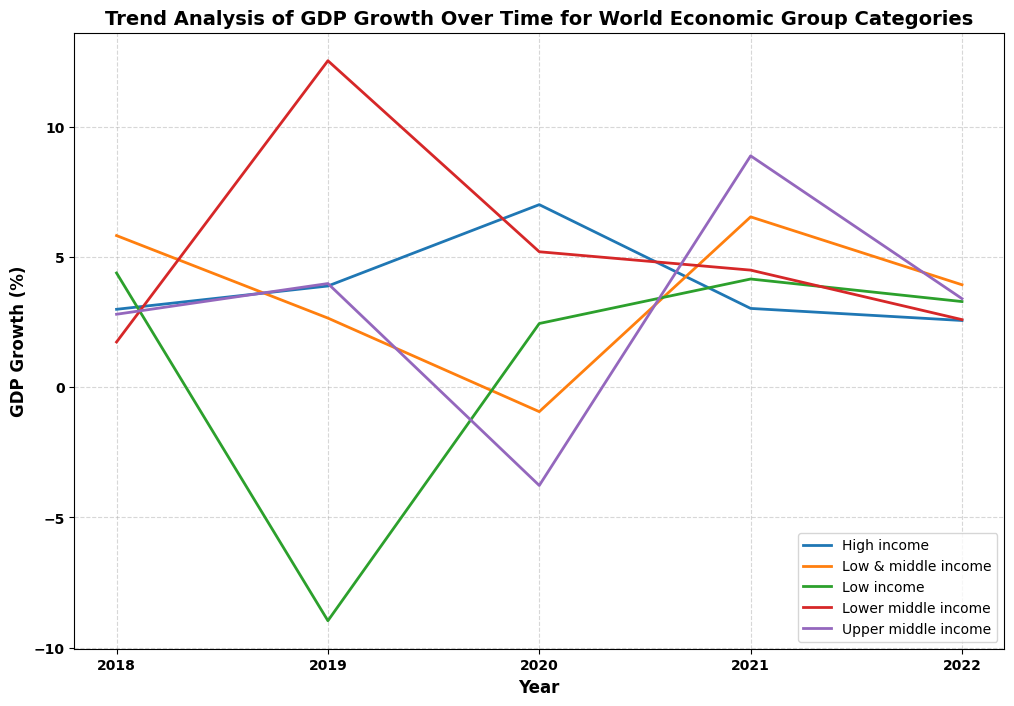

In [12]:
# Analysis 2: Trend analysis of GDP growth over five years for world economic group categories

# Create a copy of the data for the trends analysis
economic_groups_data = imputed_data.copy()

# Define and categorize to economic groups as available in the data
economic_groups = ['High income', 'Low & middle income', 'Low income', 'Lower middle income', 'Upper middle income']

# Create a new column 'economic_group' based on the economic groups list
economic_groups_data['economic_groups'] = economic_groups_data['country_name'].apply(lambda x: next((group for group in economic_groups if group in str(x)), None))

# Filter out rows where economic_group is not present
economic_groups_data = economic_groups_data.dropna(subset=['economic_groups'])

# Group by year and economic group, and get the GDP growth data
gdp_growth_by_group = economic_groups_data.pivot_table(index='year', columns='economic_groups', values='gdp_growth_annual_percent')

# Create line plot
plt.figure(figsize=(12, 8))

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, column in enumerate(gdp_growth_by_group.columns):
    plt.plot(gdp_growth_by_group.index, gdp_growth_by_group[column], label=column, color=colors[i], linestyle='-', linewidth=2)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('GDP Growth (%)', fontsize=12, fontweight='bold')
plt.title('Trend Analysis of GDP Growth Over Time for World Economic Group Categories', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')


# Save the plot as an image file
plt.savefig('gdp_growth_trend.png', bbox_inches='tight')




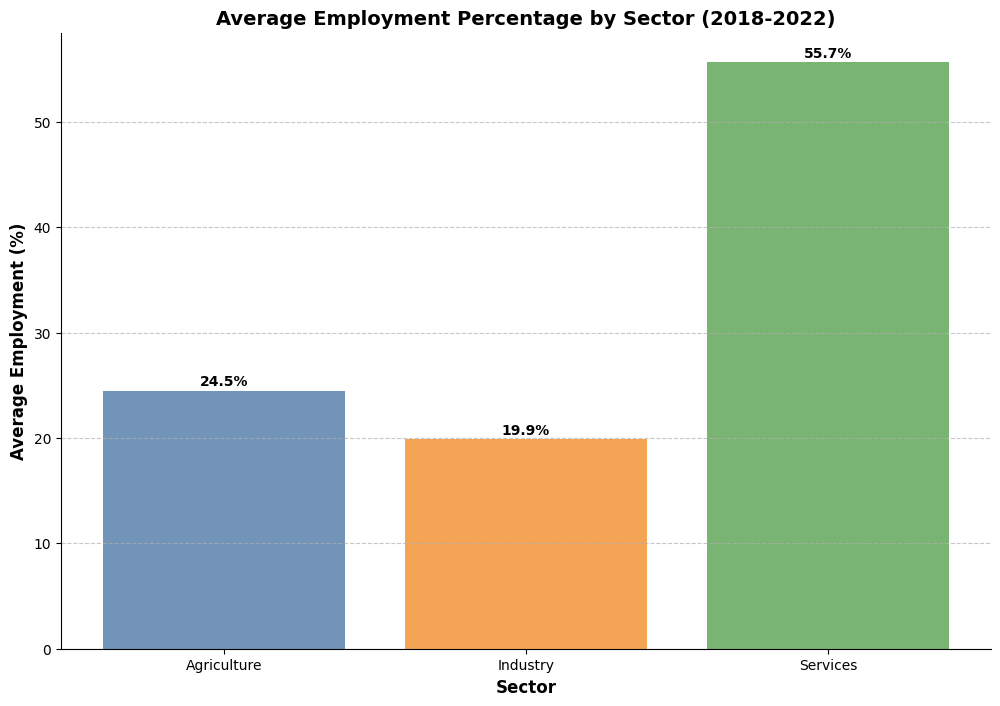

In [13]:
# Analysis 3: Average employment by sector across countries

# Define the sectors
sectors = ['employment_agriculture_modeled', 'employment_industry_modeled', 'employment_services_modeled']

# Calculate the average employment(percentages) for each sector
avg_employment = imputed_data[sectors].mean()

# Define custom sector labels to make presentable
custom_labels = ['Agriculture', 'Industry', 'Services']

# Create a bar chart with improved aesthetics
plt.figure(figsize=(12, 8))
plt.bar(sectors, avg_employment, color=['#4e79a7', '#f28e2b', '#59a14f'], alpha=0.8)

# Add data labels
for i, v in enumerate(avg_employment):
    plt.text(i, v + 0.2, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set labels and title with improved aesthetics
plt.xlabel('Sector', fontsize=12, fontweight='bold')
plt.ylabel('Average Employment (%)', fontsize=12, fontweight='bold')
plt.title('Average Employment Percentage by Sector (2018-2022)', fontsize=14, fontweight='bold')

# Set custom x-axis labels
plt.xticks(range(len(sectors)), custom_labels)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as an image file (e.g., PNG)
plt.savefig('average_employment_by_sector.png', bbox_inches='tight')

# Display the plot
plt.show()


<ipython-input-14-b8d05657e562>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


Correlation Heatmap between Labor Participation, Unemployment, Employment, and GDP Growth across countries


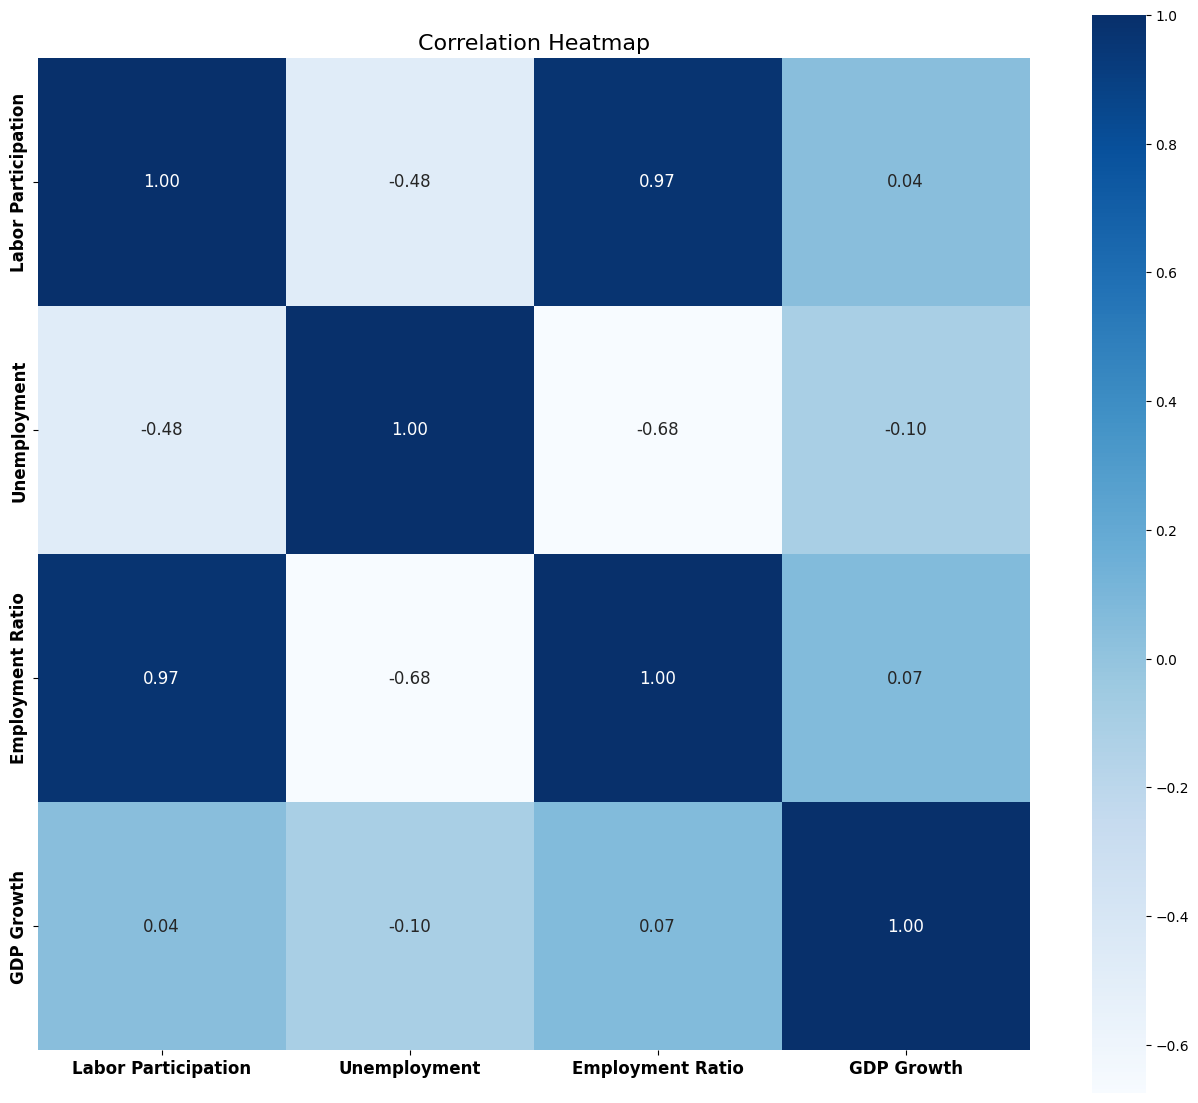

In [14]:
# Analysis 4: Correlation heat map between labor force participation, unemployment, employment and GDP growth.

# Create a mapping for column names
column_name_mapping = {
    'Labor_participation_rate_total_modeled': 'Labor Participation',
    'unemployment_total_modeled': 'Unemployment',
    'employment_ratio_15+_total_modeled': 'Employment Ratio',
    'gdp_growth_annual_percent': 'GDP Growth'
}

# Apply the mapping to rename the columns
imputed_data = imputed_data.rename(columns=column_name_mapping)

# Select relevant columns for correlation analysis
correlation_columns = ['Labor Participation', 'Unemployment', 'Employment Ratio', 'GDP Growth']

# Create a subset of the data with selected columns
correlation_data = imputed_data[['country_name', 'year'] + correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f", annot_kws={'size': 12})
plt.title('Correlation Heatmap', fontsize=16)

# State font size and weight for x-axis and y-axis labels
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Caption
caption = "Correlation Heatmap between Labor Participation, Unemployment, Employment, and GDP Growth across countries"
print(caption)

# Save the heatmap as an image file (e.g., PNG)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

# Show the heatmap
plt.show()